<a href="https://colab.research.google.com/github/kairamilanifitria/Bootcamp-NLP/blob/main/Weekly_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset "diabetes.csv"
data = pd.read_csv("/content/drive/MyDrive/Bootcamp AI/Dataset/diabetes.csv")

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Penjelasan :

**Pregnancies**	: Jumlah berapa kali kehamilan yang dialami oleh orang tersebut

**Glucose** : Konsentrasi glukosa plasma dalam darah setelah 2 jam tes toleransi glukosa (mg/dL)

**BloodPressure** : Tekanan darah (mmHg)

**SkinThickness** : Ketebalan lipatan kulit trisep (mm)

**Insulin** : Kadar insulin serum setelah 2 jam tes toleransi glukosa (micro U/ml)

**BMI** : Body Mass Index dari berat/tinggi ((kg/m)^2)

**DiabetesPedigreeFunction** : Probabilitas diabetes berdasarkan riwayat diabetes dalam keluarga

**Age** : Umur (tahun)

**OUtcome** : variabel target yang menunjukkan apakah seseorang menderita diabetes atau tidak, (1=diabetes, 0=tidak diabetes)



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.shape

(768, 9)

In [7]:
# melihat data yang kosong
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


tidak ada data yang kosong

# 1. Data Cleaning

Tambahan:

Dari pengecekan dengan data describe, terdapat data yang perlu dikaji kembali. Contohnya blood pressure yang bernilai 0, skin thickness 0, dan kadar glukosa 0.Angka angka tersebut tidak normal, maka kita ubah dari nilai 0 menjadi NaN.

In [8]:
data.replace({
    'BloodPressure': 0,
    'SkinThickness': 0,
    'Glucose': 0,
    'Insulin': 0,
    'BMI': 0
}, np.nan, inplace=True)

In [9]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
data.isnull().sum()/len(data)*100

,0
Pregnancies,0.000000
Glucose,0.651042
BloodPressure,4.557292
SkinThickness,29.557292
Insulin,48.697917
BMI,1.432292
DiabetesPedigreeFunction,0.000000
Age,0.000000
Outcome,0.000000


Kolom Insulin memiliki hampir 50% nilai NaN. Oleh karena itu, akan lebih baik untuk menghapus kolom tersebut sepenuhnya

In [11]:
data.drop(columns=["Insulin"], inplace=True)

In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
# setelah data diubah ke NaN, maka bisa dipilih untuk handlingnya, bisa dengan imputasi dengan median
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Pregnancies', 'BMI']
for column in columns_to_replace:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

In [14]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


data kosong sudah diisi dengan nilai median pada masing-masing attributes

# 2. Data Analytics

perlu dilihat hubungan antar attribute dengan target variable yang ditampilkan dalam bentuk visualisasi data

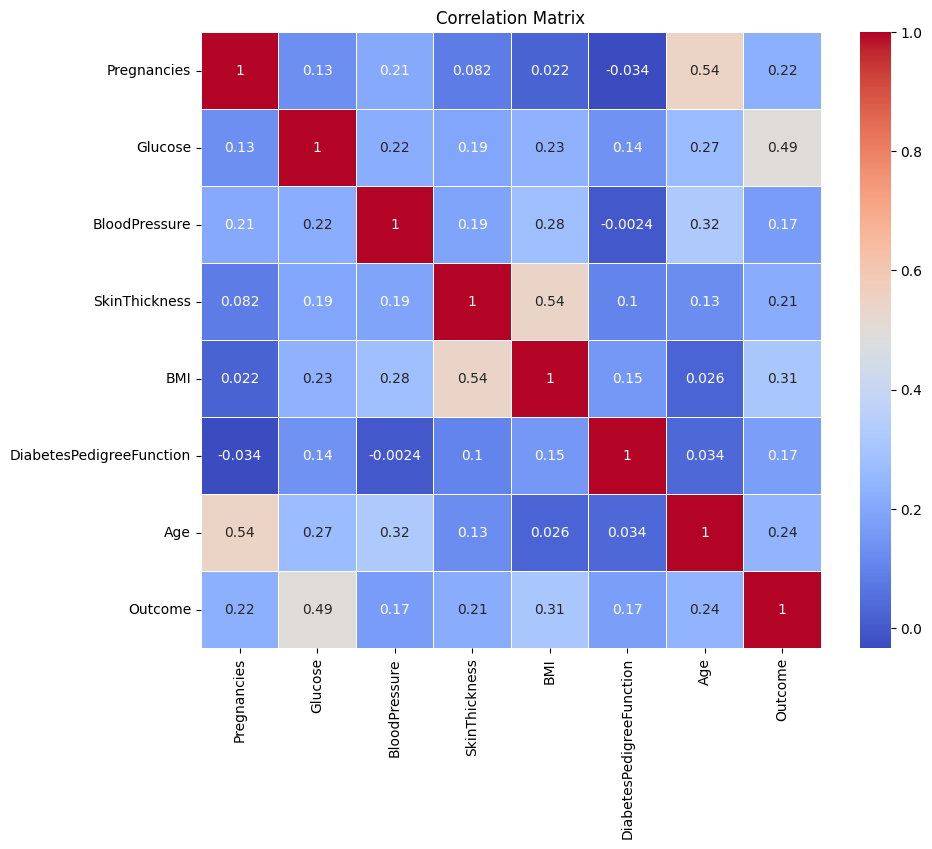

In [15]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

korelasi tertinggi ada pada nilai "Glucose" terhadap "Outcome:"

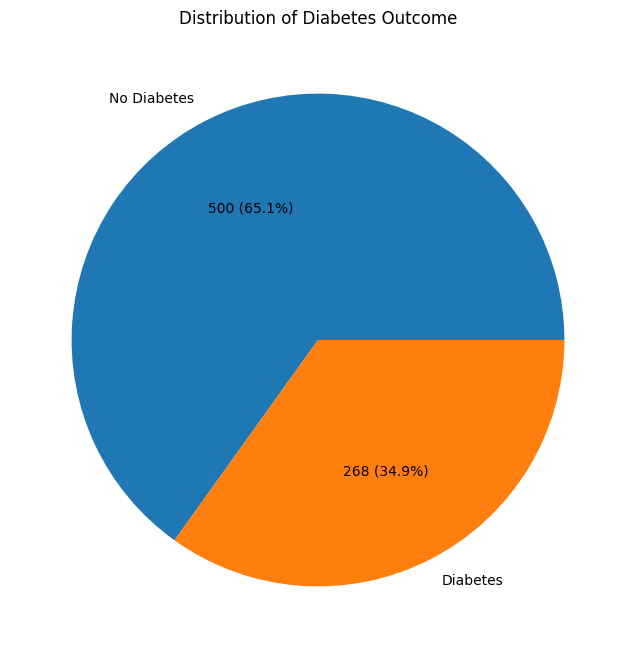

In [16]:
plt.figure(figsize=(8, 8))
counts = data['Outcome'].value_counts()
plt.pie(counts, labels=['No Diabetes', 'Diabetes'], autopct=lambda p: '{:.0f} ({:.1f}%)'.format(p * sum(counts) / 100, p))
plt.title('Distribution of Diabetes Outcome')
plt.show()


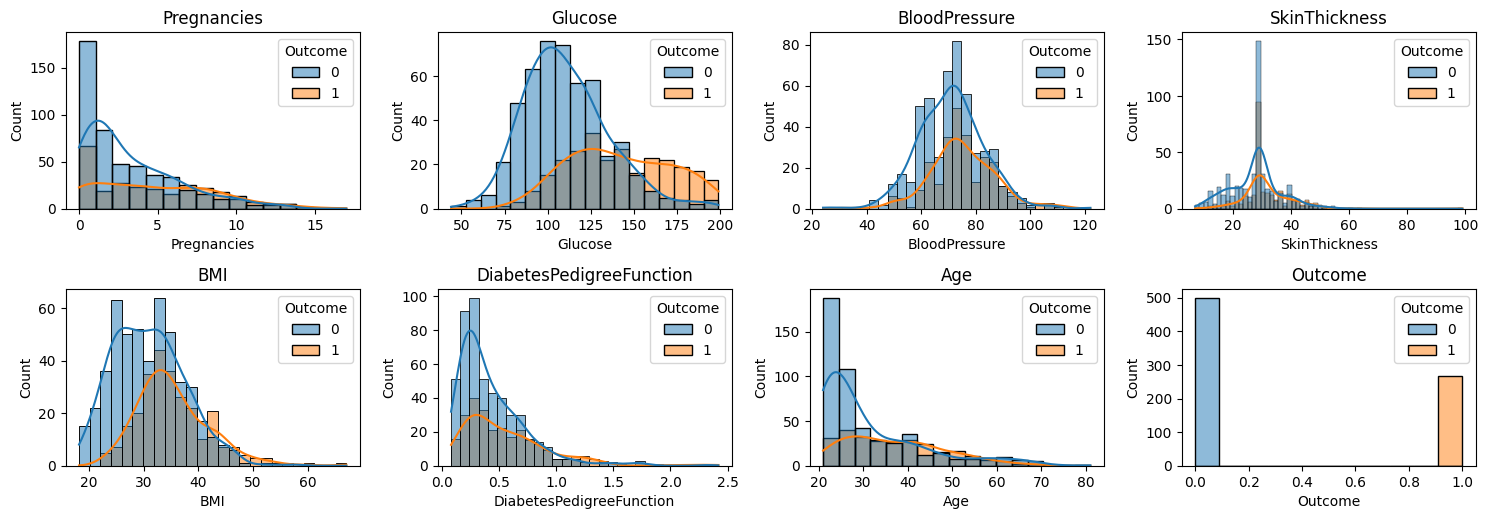

In [17]:

plt.figure(figsize=(15, 10))

for i, column in enumerate(data.columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data=data, x=column, hue='Outcome', kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()


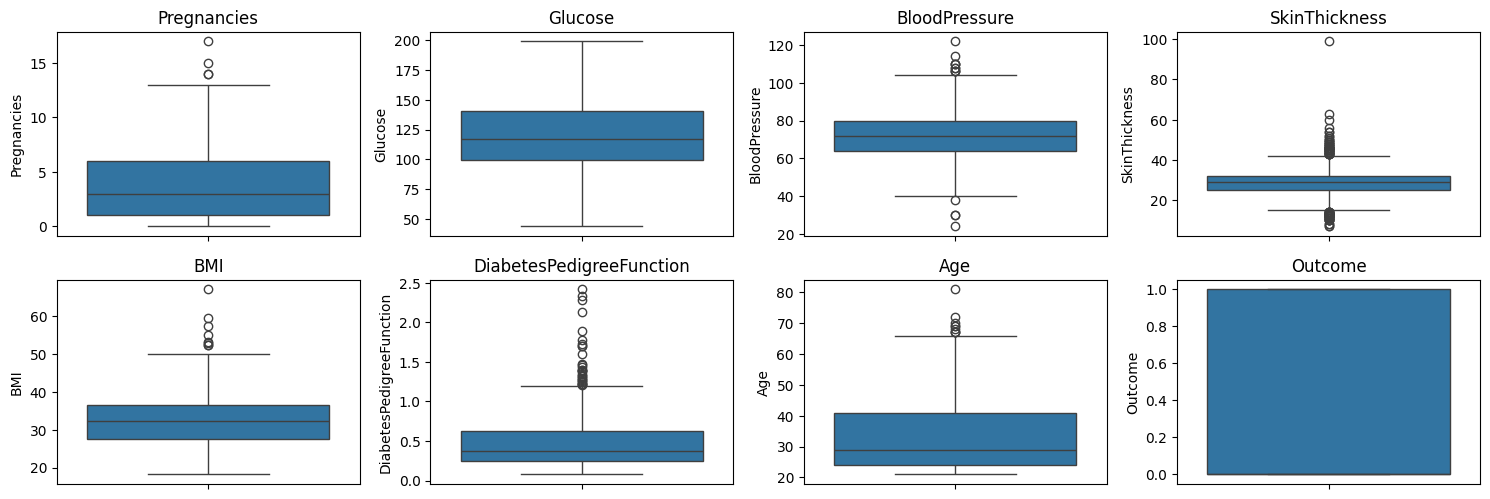

In [18]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(data.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()


beberapa attributes memiliki outlier, maka harus di handle terlebih dahulu

In [19]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                  5.0000
Glucose                     40.5000
BloodPressure               16.0000
SkinThickness                7.0000
BMI                          9.1000
DiabetesPedigreeFunction     0.3825
Age                         17.0000
Outcome                      1.0000
dtype: float64


In [20]:
# buang semua data outlier
data_out = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'Before: {data.shape}, After: {data_out.shape}')

Before: (768, 8), After: (627, 8)


In [21]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,81.000000,1.000000


# 3. Data Modelling

In [22]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
# Split the data into features (X) and target variable (y)
X = data_out.drop('Outcome', axis=1)
y = data_out['Outcome']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model 1

In [26]:
# Define the neural network model
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(12, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Compile the model
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
model_1.fit(X_train, y_train, epochs=250, batch_size=8)

Epoch 1/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6018 - loss: 0.6630
Epoch 2/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7131 - loss: 0.5846
Epoch 3/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7200 - loss: 0.5464
Epoch 4/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7890 - loss: 0.4631
Epoch 5/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7428 - loss: 0.4965
Epoch 6/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7905 - loss: 0.4637
Epoch 7/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7935 - loss: 0.4479
Epoch 8/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7658 - loss: 0.4590
Epoch 9/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7766 - loss: 0.4520
Epoch 10/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7804 - loss: 0.4421
Epoch 11/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7532 - loss: 0.4610
Epoch 12/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

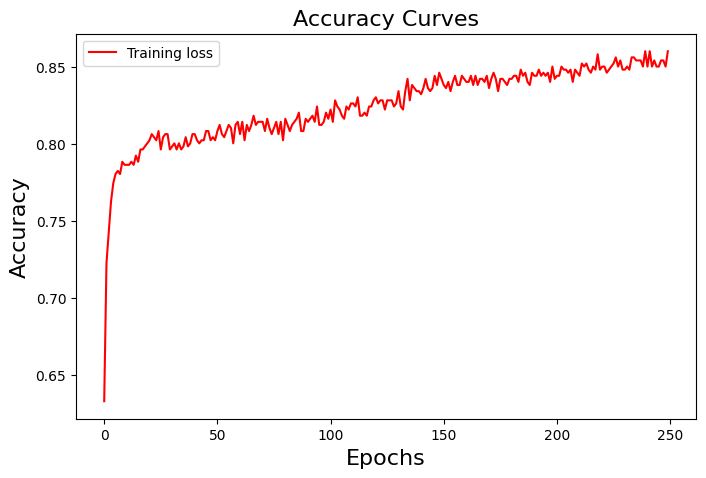

In [30]:
plt.figure(figsize=[8,5])
plt.plot(model_1.history.history['accuracy'], 'r')
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [31]:
# evaluate the keras model
_, accuracy = model_1.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 77.78


## Model_2

In [32]:
# Define the neural network model
model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(12, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 12)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
model_2.fit(X_train, y_train, epochs=250, batch_size=8)

Epoch 1/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5521 - loss: 0.6859
Epoch 2/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7755 - loss: 0.6596
Epoch 3/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7564 - loss: 0.6139
Epoch 4/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7535 - loss: 0.5577
Epoch 5/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8004 - loss: 0.4739
Epoch 6/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7943 - loss: 0.4803
Epoch 7/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7586 - loss: 0.5044
Epoch 8/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7898 - loss: 0.4514
Epoch 9/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8130 - loss: 0.4139
Epoch 10/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7709 - loss: 0.4402
Epoch 11/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8014 - loss: 0.4329
Epoch 12/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

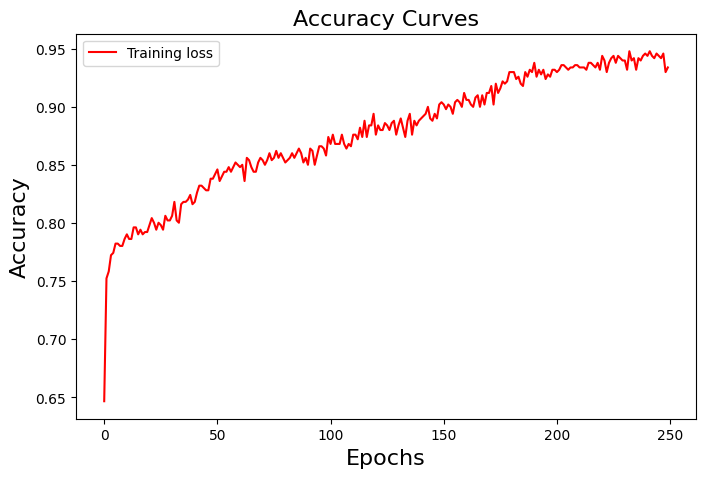

In [36]:
plt.figure(figsize=[8,5])
plt.plot(model_2.history.history['accuracy'], 'r')
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [37]:
# evaluate the keras model
_, accuracy = model_2.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 75.40




## Model_3

In [38]:
# Define the neural network model
model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [39]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 10)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 421 (1.64 KB)

 Trainable params: 421 (1.64 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Compile the model
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
model_3.fit(X_train, y_train, epochs=250, batch_size=8)

Epoch 1/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6167 - loss: 0.6916
Epoch 2/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7028 - loss: 0.6672
Epoch 3/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7409 - loss: 0.5900
Epoch 4/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7792 - loss: 0.5051
Epoch 5/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7980 - loss: 0.4305
Epoch 6/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7603 - loss: 0.4540
Epoch 7/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7869 - loss: 0.4298
Epoch 8/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7951 - loss: 0.4276
Epoch 9/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8029 - loss: 0.4268
Epoch 10/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7952 - loss: 0.4076
Epoch 11/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7912 - loss: 0.3972
Epoch 12/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy

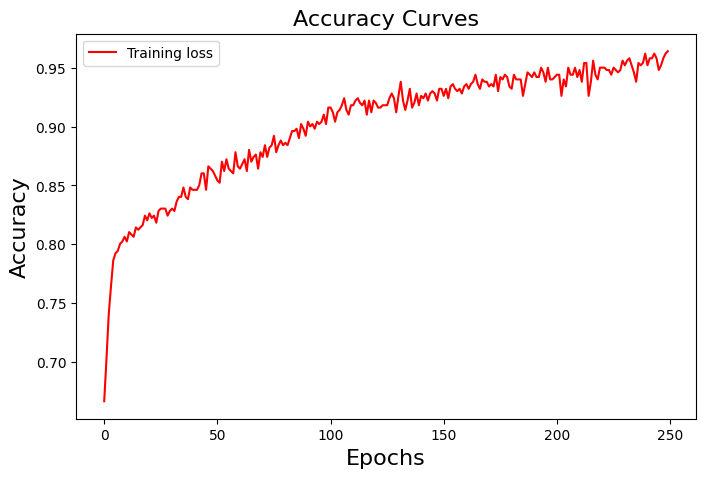

In [42]:
plt.figure(figsize=[8,5])
plt.plot(model_3.history.history['accuracy'], 'r')
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [43]:
# evaluate the keras model
_, accuracy = model_3.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 69.84




## Model_4

In [44]:
# Define the neural network model
model_4 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(12, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [45]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 12)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 457 (1.79 KB)

 Trainable params: 457 (1.79 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Compile the model
model_4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [47]:
model_4.fit(X_train, y_train, epochs=250, batch_size=8)

Epoch 1/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4722 - loss: 0.6968
Epoch 2/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6524 - loss: 0.6339
Epoch 3/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6691 - loss: 0.5508
Epoch 4/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7400 - loss: 0.5113
Epoch 5/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7846 - loss: 0.4597
Epoch 6/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7609 - loss: 0.4720
Epoch 7/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8040 - loss: 0.4079
Epoch 8/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8011 - loss: 0.4353
Epoch 9/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8218 - loss: 0.4196
Epoch 10/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7834 - loss: 0.4307
Epoch 11/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8232 - loss: 0.4020
Epoch 12/250
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

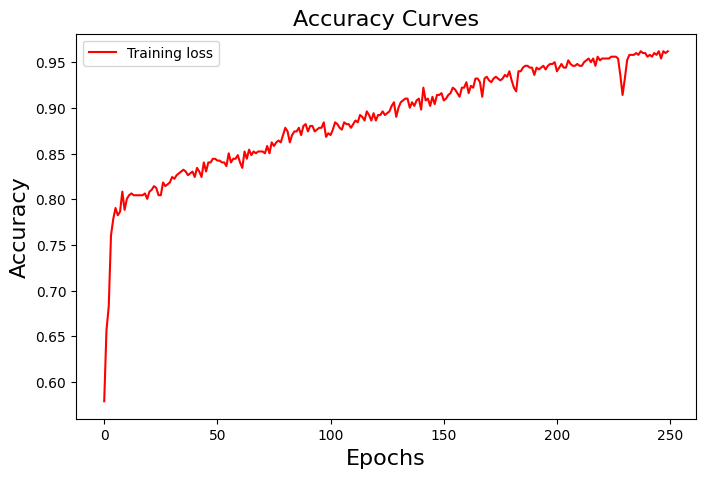

In [48]:
plt.figure(figsize=[8,5])
plt.plot(model_4.history.history['accuracy'], 'r')
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [49]:
# evaluate the keras model
_, accuracy = model_4.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 68.25




## Model_5

In [50]:
# Define the neural network model
model_5 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(12, activation='relu', input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [51]:
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                     │ (None, 12)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 20)                  │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# Compile the model
model_5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [53]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model with early stopping
model_5.fit(X_train, y_train, epochs=250, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3431 - loss: 0.7312 - val_accuracy: 0.3762 - val_loss: 0.7089
Epoch 2/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4469 - loss: 0.6994 - val_accuracy: 0.6040 - val_loss: 0.6862
Epoch 3/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6654 - loss: 0.6717 - val_accuracy: 0.6238 - val_loss: 0.6689
Epoch 4/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6534 - loss: 0.6595 - val_accuracy: 0.6238 - val_loss: 0.6515
Epoch 5/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6593 - loss: 0.6375 - val_accuracy: 0.6238 - val_loss: 0.6311
Epoch 6/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6699 - loss: 0.6104 - val_accuracy: 0.6238 - val_loss: 0.6044
Epoch 7/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6754 - loss: 0.5700 - val_accuracy: 0.6238 - val_loss: 0.5802
Epoch 8/250
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6661 - loss: 0.5497 - val_accuracy: 0.6238 - 

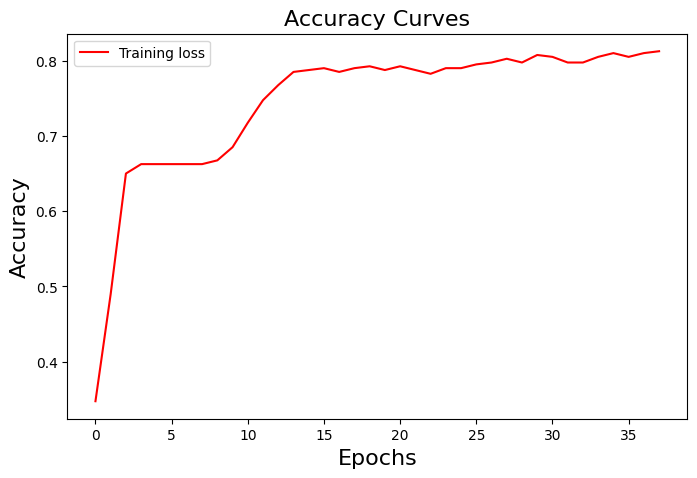

In [54]:
plt.figure(figsize=[8,5])
plt.plot(model_5.history.history['accuracy'], 'r')
plt.legend(['Training loss'])
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)

plt.show()

In [55]:
# evaluate the keras model
_, accuracy = model_5.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {accuracy*100:.2f}')

Accuracy: 76.19


# 4. Data Evaluation

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


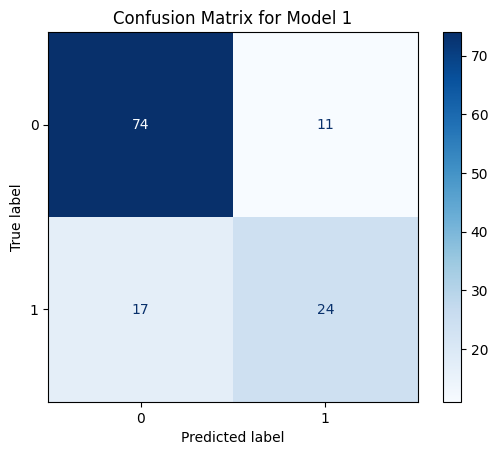

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Model 1
y_pred_1 = (model_1.predict(X_test) > 0.5).astype("int32")
cm_1 = confusion_matrix(y_test, y_pred_1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_1)
disp.plot(cmap=plt.cm.Blues, values_format='d')

plt.title('Confusion Matrix for Model 1')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


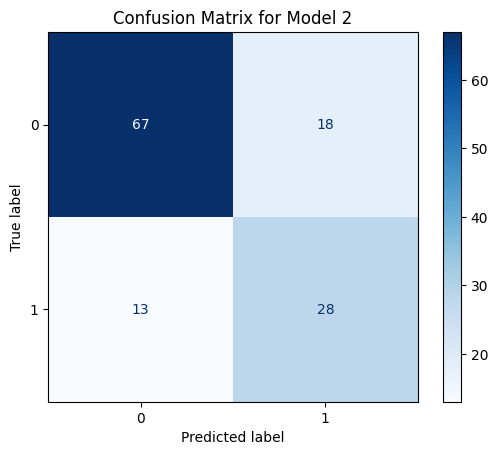

In [71]:
# Model 2
y_pred_2 = (model_2.predict(X_test) > 0.5).astype("int32")
cm_2 = confusion_matrix(y_test, y_pred_2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_2)
disp.plot(cmap=plt.cm.Blues, values_format='d')

plt.title('Confusion Matrix for Model 2')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


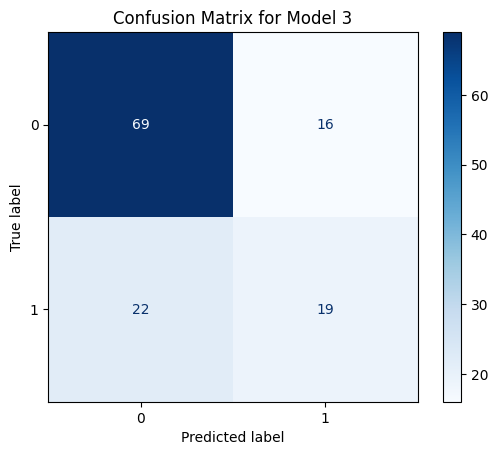

In [72]:
# Model 3
y_pred_3 = (model_3.predict(X_test) > 0.5).astype("int32")
cm_3 = confusion_matrix(y_test, y_pred_3)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_3)
disp.plot(cmap=plt.cm.Blues, values_format='d')

plt.title('Confusion Matrix for Model 3')
plt.show()

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step


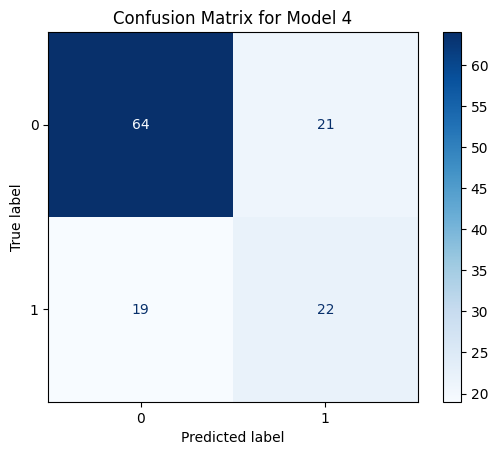

In [73]:
# Model 4
y_pred_4 = (model_4.predict(X_test) > 0.5).astype("int32")
cm_4 = confusion_matrix(y_test, y_pred_4)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_4)
disp.plot(cmap=plt.cm.Blues, values_format='d')

plt.title('Confusion Matrix for Model 4')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


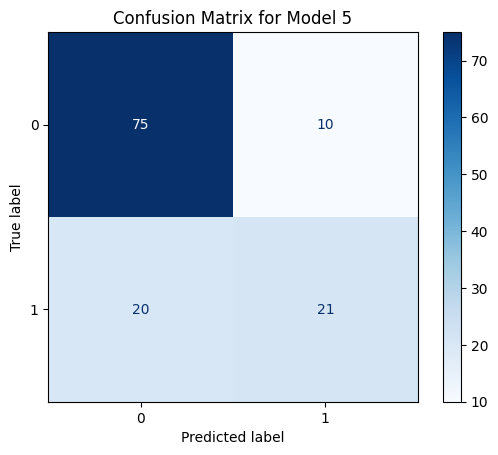

In [74]:
# Model 5
y_pred_5 = (model_5.predict(X_test) > 0.5).astype("int32")
cm_5 = confusion_matrix(y_test, y_pred_5)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_5)
disp.plot(cmap=plt.cm.Blues, values_format='d')

plt.title('Confusion Matrix for Model 5')
plt.show()

# 5. Model Deployment